# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [11]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
# 設定 data_path
dir_data = './data/'

In [13]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [14]:
#1
"""
Your code here
"""
app_train['CNT_CHILDREN'].values.max()
cut_rule = [0,0.9,2,5,19]

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()

(-0.001, 0.9]    215371
(0.9, 2.0]        87868
(2.0, 5.0]         4230
(5.0, 19.0]          42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [15]:
#practice:examine 'app_train.groupby(grp)''
grp = ['CNT_CHILDREN_GROUP','TARGET']
group_df=app_train.groupby(grp)
group_df.mean()

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  \
CNT_CHILDREN_GROUP TARGET                                                  
(-0.001, 0.9]      0       278265.933071      0.000000     166747.010980   
                   1       277943.756638      0.000000     160804.210548   
(0.9, 2.0]         0       278356.401906      1.304891     174590.584401   
                   1       276479.294979      1.299602     176115.362720   
(2.0, 5.0]         0       274863.100787      3.138583     175053.742913   
                   1       276428.254762      3.164286     160677.385714   
(5.0, 19.0]        0       270091.818182      8.454545     139159.090909   
                   1       251511.444444      7.222222     180000.000000   

                              AMT_CREDIT   AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN_GROUP TARGET                                                 
(-0.001, 0.9]      0       602331.278179  26964.671796    543447.138423   
                   1       560470.342856  26246.125233    492989.507050   
(0.9, 2.0]         0       603031.134689  27609.179500    540724.904008   
                   1       551190.755683  26932.735778    479849.680679   
(2.0, 5.0]         0       612094.531890  28212.395669    549013.034850   
                   1       573066.857143  27328.660714    498733.800000   
(5.0, 19.0]        0       492311.181818  23079.272727    421772.727273   
                   1       576614.500000  31573.000000    511000.000000   

                           REGION_POPULATION_RELATIVE    DAYS_BIRTH  \
CNT_CHILDREN_GROUP TARGET                                             
(-0.001, 0.9]      0                         0.021216 -17200.689251   
                   1                         0.019429 -15755.770185   
(0.9, 2.0]         0                         0.020599 -13616.607422   
                   1                         0.018533 -13116.084885   
(2.0, 5.0]         0                         0.019695 -13718.567979   
                   1                         0.018548 -13224.021429   
(5.0, 19.0]        0                         0.017276 -14965.242424   
                   1                         0.013032 -15469.777778   

                           DAYS_EMPLOYED  DAYS_REGISTRATION  \
CNT_CHILDREN_GROUP TARGET                                     
(-0.001, 0.9]      0        91107.220042       -5461.333419   
                   1        60834.591005       -4817.892709   
(0.9, 2.0]         0         5426.211548       -4039.651141   
                   1         5115.903172       -3852.374984   
(2.0, 5.0]         0         7127.126509       -3346.115223   
                   1         5314.592857       -3161.607143   
(5.0, 19.0]        0        31414.969697       -4253.484848   
                   1        -2619.000000       -5136.555556   

                                      ...              FLAG_DOCUMENT_18  \
CNT_CHILDREN_GROUP TARGET             ...                                 
(-0.001, 0.9]      0                  ...                      0.007889   
                   1                  ...                      0.005238   
(0.9, 2.0]         0                  ...                      0.009503   
                   1                  ...                      0.006935   
(2.0, 5.0]         0                  ...                      0.007612   
                   1                  ...                      0.002381   
(5.0, 19.0]        0                  ...                      0.000000   
                   1                  ...                      0.000000   

                           FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
CNT_CHILDREN_GROUP TARGET                                       
(-0.001, 0.9]      0               0.000589          0.000458   
                   1               0.000542          0.000482   
(0.9, 2.0]         0               0.000649          0.000624   
                   1               0.000385          0.000642   
(2.0, 5.0]         0               

In [16]:
#2-1
"""
Your code here
"""
grp = ['CNT_CHILDREN_GROUP','TARGET']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP  TARGET
(-0.001, 0.9]       0         166747.010980
                    1         160804.210548
(0.9, 2.0]          0         174590.584401
                    1         176115.362720
(2.0, 5.0]          0         175053.742913
                    1         160677.385714
(5.0, 19.0]         0         139159.090909
                    1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

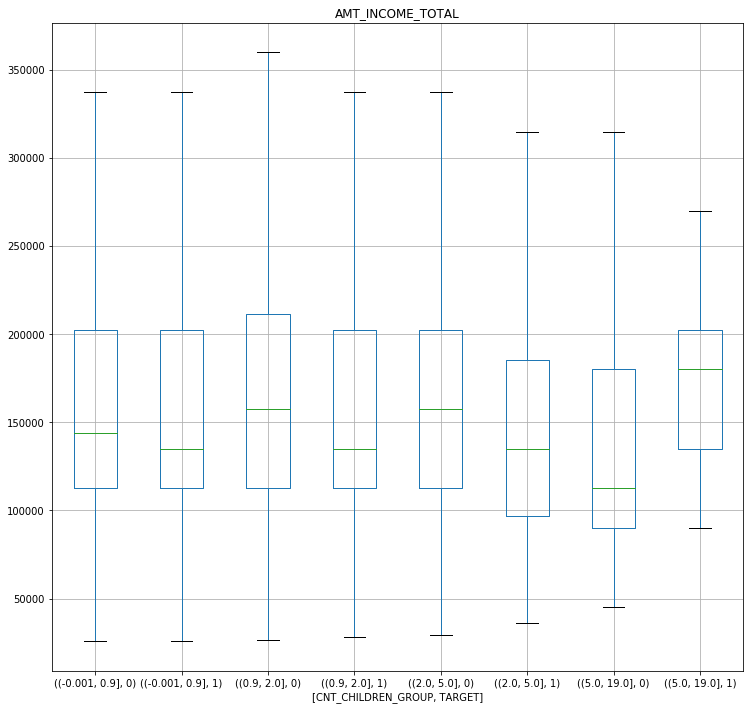

In [19]:
#2-2
"""
Your code here
"""
plt_column = ['AMT_INCOME_TOTAL']
plt_by = ['CNT_CHILDREN_GROUP','TARGET']

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [ ]:
#3
"""
Your code here
"""
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: x/ (x- np.mean(x)/ np.std(x)))

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()